In [1]:
#Accuracy

#Using straight python
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
        # if prediction is equal to truth, increase the counter
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

#Using sklearnrom sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
# metrics.accuracy_score(l1, l2)

In [2]:
#Precision for binary calculation

def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

true_positive(l1, l2)

false_positive(l1, l2)

false_negative(l1, l2)

true_negative(l1, l2)

3

In [3]:
#Combining all accuracy parameters

def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score


accuracy_v2(l1,l2)

0.625

In [4]:
#precision using TP FP

def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

precision(l1,l2)

0.6666666666666666

In [5]:
#Recall

def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

recall(l1,l2)

0.5

Text(0, 0.5, 'Precision')

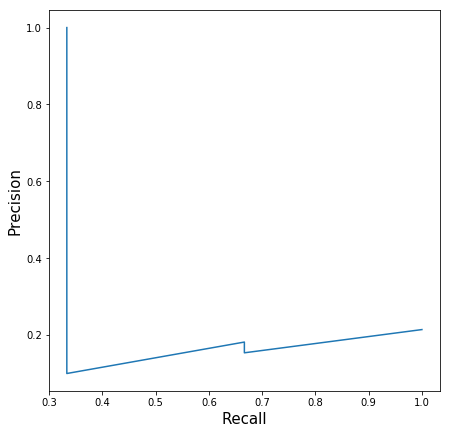

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937,  0.0191491,  0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377,   0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)
    
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [7]:
#Calculate F1 Score

def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

f1(l1,l2)

0.5714285714285715

In [8]:
#Shortcut to do all this?

from sklearn import metrics
metrics.f1_score(l1,l2)

0.5714285714285715

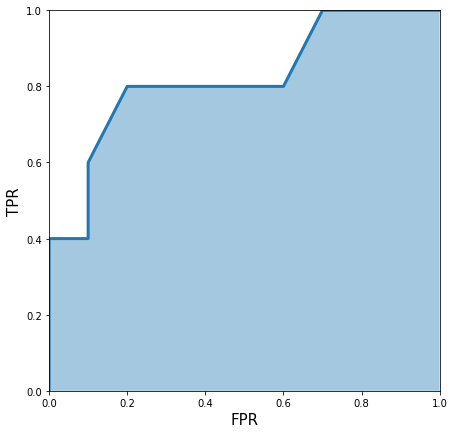

In [9]:
#True postive rate and False Positive rate

def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
# handmade thresholds

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]

    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
    
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [10]:
#The area under this curve is a metric called Area Under ROC Curve or Area Under Curve or just simply AUC

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [11]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    
    # initialize empty list to store
    # individual losses
    loss = []
    
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
    # adjust probability
    # 0 gets converted to 1e-15
    # 1 gets converted to 1-1e-15
    # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
            yt * np.log(yp)
            + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
        # return mean loss over all samples
    return np.mean(loss)

y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [12]:
# Using SKlearn

from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294

In [13]:
#MACRO MICRO and WEIGHTED PRECISION FOR MULTICLASS

def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: macro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        
        # keep adding precision for all classes
        precision += temp_precision
    
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
    
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    
    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        
        # add to overall precision
        precision += weighted_precision
    
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [ ]:
#Comparing Sklearn and Self written code

print(macro_precision(y_true, y_pred), metrics.precision_score(y_true, y_pred, average="macro"))

print(micro_precision(y_true, y_pred), metrics.precision_score(y_true, y_pred, average="micro"))

print(weighted_precision(y_true, y_pred), metrics.precision_score(y_true, y_pred, average="weighted"))